In [1]:
# Меня зовут Баин Илья Дмитриевич, я являюсь студентом 4 курса РГУ нефти и газа имени И.М.Губкина

# Целью моего участия является совершенствование своих знаний в области Data Science, получение опыта на конкретных задачах

# Я стал развиваться в этом направлении, так как считаю, что нефтяной индустрии нужны люди, способные
# к анализу больших объемов информации, принятие важных стратегических решений, а также умеющие работать
# с интструментами программирования

In [64]:
# Здравствуй, уважаемый гость! Рад, что ты заглянул к нам, присаживайся поудобнее. 
# Из мира магглов мы узнали, как с помощью циферок и единичек анализировать результаты нашей работы.
# Это поможет нам разобраться во всех аспектов жизни в волшебном мире.
# Этот код был написал с целью - помочь жителям нашего мира разобраться, насколько эффективно работают "промоакции"

In [2]:
# Ход наших действий будет таков 
# 1 - Мы узнаем в какие периоды с 1996 по 1997 года был самый большой прирост продажи напитков в литрах
# 2 - Отметим те месяцы, где дополнительный объем увеличивался больше всего
# 3 - Узнаем какие акции в тот период проводились в волшебном мире
# 4 - Найдем по месяцам среднее количество продаж 
# 5 - Сравним, в процентах, насколько повысило количество продаж наличие определенных акций
# (Узнаем названия акций, которые были наиболее эффективны, чтобы они проводились чаще)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
sales = r'C:\Data Science Газпром\Data Science\Data Science\sales.parquet'
promo = r'C:\Data Science Газпром\Data Science\Data Science\promo.parquet'
drinks = r'C:\Data Science Газпром\Data Science\Data Science\drinks.parquet'
daily_volume = r'C:\Data Science Газпром\Data Science\Data Science\daily_volume.parquet'
effect = r'C:\Data Science Газпром\Data Science\Data Science\effect.parquet'

In [5]:
df_sales = pd.read_parquet(sales, engine='auto')
df_promo = pd.read_parquet(promo, engine='auto')
df_drinks = pd.read_parquet(drinks, engine='auto')
df_effect = pd.read_parquet(effect, engine='auto')
df_daily = pd.read_parquet(daily_volume, engine='auto')

In [6]:
#Заменяем на значение даты для удобства
df_promo['Начало'] = pd.to_datetime(df_promo['Начало'])
df_promo['Конец'] = pd.to_datetime(df_promo['Конец'])
df_daily['date'] = pd.to_datetime(df_daily['date'])

In [7]:
#Посмотрим, как акции стояли по порядку
df_promo.sort_values('Начало').fillna(0).head()

,Название,Начало,Конец,Кромер,Париж,Бат,Лондон,Салем,Коукворт,Авимор,Даффтаун,Абердин,Нью-Йорк,Литтл Уингинг,Алкогольное,Безалкогольное,"Затраты на акцию, галлеонов"
3,0,1996-01-01,1996-02-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1292.139684
24,0,1996-01-13,1996-01-26,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000
25,Минус кнат алкогольное,1996-01-31,1996-02-25,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000
29,С литрушки на лягушку скидка на безалкогольные...,1996-02-07,1996-03-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2799.590233
28,Скидка на Сливочное пиво 2 кната если на барм...,1996-02-07,1996-02-21,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000


In [8]:
#Эффект от акций за 1996 год
df_effect_January = df_effect.loc[df_effect['date'] < '1996-02-01']
df_effect_February = df_effect.loc[(df_effect['date'] >= '1996-02-01') & (df_effect['date'] < '1996-03-01')]
df_effect_March = df_effect.loc[(df_effect['date'] >= '1996-03-01') & (df_effect['date'] < '1996-04-01')]
df_effect_April = df_effect.loc[(df_effect['date'] >= '1996-04-01') & (df_effect['date'] < '1996-05-01')]
df_effect_May = df_effect.loc[(df_effect['date'] >= '1996-05-01') & (df_effect['date'] < '1996-06-01')]
df_effect_June  = df_effect.loc[(df_effect['date'] >= '1996-06-01') & (df_effect['date'] < '1996-07-01')]
df_effect_July = df_effect.loc[(df_effect['date'] >= '1996-07-01') & (df_effect['date'] < '1996-08-01')]
df_effect_August = df_effect.loc[(df_effect['date'] >= '1996-08-01') & (df_effect['date'] < '1996-09-01')]
df_effect_September = df_effect.loc[(df_effect['date'] >= '1996-09-01') & (df_effect['date'] < '1996-10-01')]
df_effect_October = df_effect.loc[(df_effect['date'] >= '1996-10-01') & (df_effect['date'] < '1996-11-01')]
df_effect_November = df_effect.loc[(df_effect['date'] >= '1996-11-01') & (df_effect['date'] < '1996-12-01')]
df_effect_December = df_effect.loc[(df_effect['date'] >= '1996-12-01') &  (df_effect['date'] < '1997-01-01')]

In [9]:
#Посчитаем среднее значение за каждый месяц
df_effect_January_mean = df_effect_January['volume_litr'].mean()
df_effect_February_mean = df_effect_February['volume_litr'].mean()
df_effect_March_mean = df_effect_March['volume_litr'].mean()
df_effect_April_mean = df_effect_April['volume_litr'].mean()
df_effect_May_mean = df_effect_May['volume_litr'].mean()
df_effect_June_mean  = df_effect_June['volume_litr'].mean()
df_effect_July_mean = df_effect_July['volume_litr'].mean()
df_effect_August_mean = df_effect_August['volume_litr'].mean()
df_effect_September_mean = df_effect_September['volume_litr'].mean()
df_effect_October_mean = df_effect_October['volume_litr'].mean()
df_effect_November_mean = df_effect_November['volume_litr'].mean()
df_effect_December_mean = df_effect_December['volume_litr'].mean()

<AxesSubplot:>

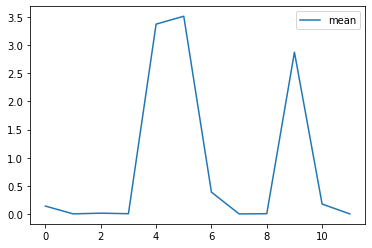

In [10]:
#Построим линейный график за 1996 год по месяцам
df_mean_1996 = pd.DataFrame({
    'mean': [df_effect_January_mean, df_effect_February_mean, df_effect_March_mean, df_effect_April_mean,df_effect_May_mean,
            df_effect_June_mean,df_effect_July_mean,df_effect_August_mean,df_effect_September_mean,df_effect_October_mean,
            df_effect_November_mean, df_effect_December_mean]})
sns.lineplot(data=df_mean_1996)

In [11]:
#Можем увидеть, что в период с Мая по Июнь и в Октябре был самый большой подъем дополнительных продаж
df_mean_1996

,mean
0,0.139334
1,0.001120
2,0.013130
3,0.003739
4,3.375802
5,3.516044
6,0.387395
7,0.000029
8,0.003781
9,2.876983


In [12]:
#Посмотрим, какие акции проводились в мае по июль(включительно) + октябрь 
df_best_valume_1996 = df_promo.loc[(df_promo['Начало'] >= '1996-05-01') & (df_promo['Конец'] < '1996-08-01')]
df_top_valume_1996 = df_promo.loc[(df_promo['Начало'] >= '1996-10-01') & (df_promo['Конец'] < '1996-11-01')]
frames = [df_best_valume_1996,df_top_valume_1996]
result_1996 = pd.concat(frames)
df_result_1996 = result_1996[['Название', 'Начало', 'Конец']].sort_values('Начало')

In [13]:
#Можно сделать вывод - данные акции принесли наибольшую пользу в 1996 году 
df_result_1996

,Название,Начало,Конец
31,С литрушки на лягушку 12 литров,1996-05-01,1996-07-14
58,Флориш и Блоттс май,1996-05-11,1996-05-24
5,Обмен любезностями,1996-06-01,1996-06-30
32,С литрушки на лягушку + Карликовые пушистики,1996-06-01,1996-07-14
59,Флориш и Блоттс июнь,1996-06-15,1996-06-28
36,Выпить на удачу,1996-10-01,1996-10-31
37,С литрушки на лягушку + Карликовые пушистики,1996-10-01,1996-10-31
62,Лавка Оливандера октябрь,1996-10-13,1996-10-31


In [14]:
#Посмотрим, какие акции стали лучшими в 1997

In [15]:
#Эффект от акций за 1997 год
df_effect_January_1997 = df_effect.loc[df_effect['date'] < '1997-02-01']
df_effect_February_1997 = df_effect.loc[(df_effect['date'] >= '1997-02-01') & (df_effect['date'] < '1997-03-01')]
df_effect_March_1997 = df_effect.loc[(df_effect['date'] >= '1997-03-01') & (df_effect['date'] < '1997-04-01')]
df_effect_April_1997 = df_effect.loc[(df_effect['date'] >= '1997-04-01') & (df_effect['date'] < '1997-05-01')]
df_effect_May_1997 = df_effect.loc[(df_effect['date'] >= '1997-05-01') & (df_effect['date'] < '1997-06-01')]
df_effect_June_1997  = df_effect.loc[(df_effect['date'] >= '1997-06-01') & (df_effect['date'] < '1997-07-01')]
df_effect_July_1997 = df_effect.loc[(df_effect['date'] >= '1997-07-01') & (df_effect['date'] < '1997-08-01')]
df_effect_August_1997 = df_effect.loc[(df_effect['date'] >= '1997-08-01') & (df_effect['date'] < '1997-09-01')]
df_effect_September_1997 = df_effect.loc[(df_effect['date'] >= '1997-09-01') & (df_effect['date'] < '1997-10-01')]
df_effect_October_1997 = df_effect.loc[(df_effect['date'] >= '1997-10-01') & (df_effect['date'] < '1997-11-01')]
df_effect_November_1997 = df_effect.loc[(df_effect['date'] >= '1997-11-01') & (df_effect['date'] < '1997-12-01')]
df_effect_December_1997 = df_effect.loc[(df_effect['date'] >= '1997-12-01') &  (df_effect['date'] < '1998-01-01')]

In [16]:
#Посчитаем среднее значение за каждый месяц
df_effect_January_1997_mean = df_effect_January_1997['volume_litr'].mean()
df_effect_February_1997_mean = df_effect_February_1997['volume_litr'].mean()
df_effect_March_1997_mean = df_effect_March_1997['volume_litr'].mean()
df_effect_April_1997_mean = df_effect_April_1997['volume_litr'].mean()
df_effect_May_1997_mean = df_effect_May_1997['volume_litr'].mean()
df_effect_June_1997_mean  = df_effect_June_1997['volume_litr'].mean()
df_effect_July_1997_mean = df_effect_July_1997['volume_litr'].mean()
df_effect_August_1997_mean = df_effect_August_1997['volume_litr'].mean()
df_effect_September_1997_mean = df_effect_September_1997['volume_litr'].mean()
df_effect_October_1997_mean = df_effect_October_1997['volume_litr'].mean()
df_effect_November_1997_mean = df_effect_November_1997['volume_litr'].mean()
df_effect_December_1997_mean = df_effect_December_1997['volume_litr'].mean()

<AxesSubplot:>

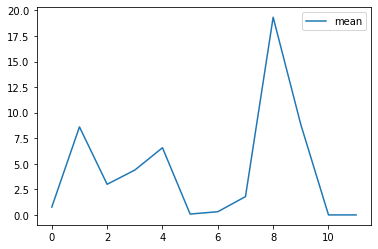

In [17]:
#Построим линейный график за 1997 год по месяцам
df_mean_1997 = pd.DataFrame({
    'mean': [df_effect_January_1997_mean, df_effect_February_1997_mean, df_effect_March_1997_mean, df_effect_April_1997_mean,df_effect_May_1997_mean,
            df_effect_June_1997_mean,df_effect_July_1997_mean,df_effect_August_1997_mean,df_effect_September_1997_mean,df_effect_October_1997_mean,
            df_effect_November_1997_mean, df_effect_December_1997_mean]})
sns.lineplot(data=df_mean_1997)

In [18]:
#В сентябре был самый большой средний по месяцу эффект от акций, также следует отметить период с Февраля по Май и Октябрь 1997г.
df_mean_1997 

,mean
0,0.767883
1,8.609608
2,2.995760
3,4.384328
4,6.570766
5,0.084101
6,0.312930
7,1.791106
8,19.334177
9,8.835988


In [19]:
#Видим,что самый большой пик на 9 месяце, нужно узнать какие акции были введены с февраля по май и в сентябре по октябрь 1997 года
df_best_valume_1997 = df_promo.loc[(df_promo['Начало'] >= '1997-09-01') & (df_promo['Конец'] < '1997-12-01')] 
df_top_valume_1997 = df_promo.loc[(df_promo['Начало'] >= '1997-02-01') & (df_promo['Конец'] < '1997-06-01')]
frames = [df_best_valume_1997, df_top_valume_1997]
result_1997 = pd.concat(frames)
df_result_1997 = result_1997[['Название', 'Начало', 'Конец']].sort_values('Начало')

In [20]:
df_result_1997

,Название,Начало,Конец
19,"""Все и сразу"" набор",1997-02-01,1997-02-28
42,С литрушки на лягушку,1997-02-01,1997-02-28
43,С литрушки на лягушку,1997-03-01,1997-03-31
1,Клинок за пророк,1997-03-09,1997-04-18
44,С литрушки на лягушку,1997-04-01,1997-04-30
20,Преданный фанат спорта,1997-04-05,1997-04-18
45,С литрушки на лягушку,1997-05-01,1997-05-31
49,С литрушки на лягушку,1997-09-01,1997-09-30
22,ПРА СУПЕР ГАЛЕОН,1997-10-01,1997-11-30
50,С литрушки на лягушку,1997-10-01,1997-10-31


In [21]:
#Поместим в общую таблицу результаты за два года
frames_results = [df_result_1996, df_result_1997]
results = pd.concat(frames_results)
results

,Название,Начало,Конец
31,С литрушки на лягушку 12 литров,1996-05-01,1996-07-14
58,Флориш и Блоттс май,1996-05-11,1996-05-24
5,Обмен любезностями,1996-06-01,1996-06-30
32,С литрушки на лягушку + Карликовые пушистики,1996-06-01,1996-07-14
59,Флориш и Блоттс июнь,1996-06-15,1996-06-28
36,Выпить на удачу,1996-10-01,1996-10-31
37,С литрушки на лягушку + Карликовые пушистики,1996-10-01,1996-10-31
62,Лавка Оливандера октябрь,1996-10-13,1996-10-31
19,"""Все и сразу"" набор",1997-02-01,1997-02-28
42,С литрушки на лягушку,1997-02-01,1997-02-28


In [22]:
#Задача - в процентах посчитать насколько увеличились реализации напитков с помощью акций

In [23]:
#Количество продукции в литрах продано за период с Мая по Июль и Октябрь 1996 года по дням
df_daily_1996_May = df_daily.loc[(df_daily['date'] >= '1996-05-01') & (df_daily['date'] < '1996-06-01')].sort_values('date')
df_daily_1996_June = df_daily.loc[(df_daily['date'] >= '1996-06-01') & (df_daily['date'] < '1996-07-01')].sort_values('date')
df_daily_1996_Jule = df_daily.loc[(df_daily['date'] >= '1996-07-01') & (df_daily['date'] < '1996-08-01')].sort_values('date')
df_daily_1996_Okt = df_daily.loc[(df_daily['date'] >= '1996-10-01') & (df_daily['date'] < '1996-11-01')].sort_values('date')
df_daily_1996_Nov = df_daily.loc[(df_daily['date'] >= '1996-11-01') & (df_daily['date'] < '1996-12-01')].sort_values('date')

In [24]:
#Средние значения продаж по месяцам: Май,Июнь,Июль,Октябрь
df_daily_1996_May_mean = df_daily_1996_May['volume_litr'].mean()
df_daily_1996_June_mean = df_daily_1996_June['volume_litr'].mean()
df_daily_1996_Jule_mean = df_daily_1996_Jule['volume_litr'].mean()
df_daily_1996_Okt_mean = df_daily_1996_Okt['volume_litr'].mean()
df_daily_1996_Nov_mean = df_daily_1996_Nov['volume_litr'].mean()

In [25]:
df_mean_1996

,mean
0,0.139334
1,0.001120
2,0.013130
3,0.003739
4,3.375802
5,3.516044
6,0.387395
7,0.000029
8,0.003781
9,2.876983


In [26]:
# Средние значения по дополнительной выручке за Май,Июнь,Июль,Октябрь за 1996
df_mean_1996_MJJO = df_mean_1996.iloc[[4,5,6,9,10]].rename(index={4:'May',5:'June',6:'Jule',9:'October',10:'November'}) 
df_mean_1996_MJJO

,mean
May,3.375802
June,3.516044
Jule,0.387395
October,2.876983
November,0.175723


In [27]:
# Таблица средних значений продаж за Май,Июнь,Июль,Октябрь 1996 года
df_mean_daily_1996_MJJO = pd.DataFrame({'Daily_mean':[df_daily_1996_May_mean,df_daily_1996_June_mean,
                                     df_daily_1996_Jule_mean,df_daily_1996_Okt_mean,df_daily_1996_Nov_mean]}).rename(index={0:'May 1996',1:'June 1996',2:'Jule 1996',3:'October 1996',4:'November 1996'}) 
df_mean_daily_1996_MJJO

,Daily_mean
May 1996,17.819107
June 1996,21.922068
Jule 1996,23.990539
October 1996,22.101447
November 1996,21.014882


In [45]:
# Получим окончательную таблицу результатов увеличения продаж напитков за 1996 год
df_mean_daily_1996_MJJO['Add_valume'] = df_mean_1996_MJJO['mean'].tolist()
df_mean_daily_1996_MJJO['Sum'] = df_mean_daily_1996_MJJO.loc[:,'Daily_mean':'Add_valume'].sum(axis=1)
df_mean_daily_1996_MJJO['Add_percent'] = df_mean_daily_1996_MJJO.apply(lambda x:x['Add_valume']/x['Sum'],axis=1).mul(100).round(1).astype(str) + '%'
df_end_1996 = df_mean_daily_1996_MJJO.round(3).style.set_caption('1996 год. Повышение объемов продажи напитков')
df_end_1996

,Daily_mean,Add_valume,Sum,Add_percent
May 1996,17.819000,3.376000,21.195000,15.9%
June 1996,21.922000,3.516000,25.438000,13.8%
Jule 1996,23.991000,0.387000,24.378000,1.6%
October 1996,22.101000,2.877000,24.978000,11.5%
November 1996,21.015000,0.176000,21.191000,0.8%


In [30]:
#Проделаем все тоже самое для 1997 года

In [48]:
#Количество продукции в литрах продано за период с Мая по Июль и Октябрь 1997 и сентябре, октрябре 1997 года по дням
df_daily_1997_Feb = df_daily.loc[(df_daily['date'] >= '1997-02-01') & (df_daily['date'] < '1997-03-01')].sort_values('date')
df_daily_1997_Mar = df_daily.loc[(df_daily['date'] >= '1997-03-01') & (df_daily['date'] < '1997-04-01')].sort_values('date')
df_daily_1997_Apr = df_daily.loc[(df_daily['date'] >= '1997-04-01') & (df_daily['date'] < '1997-05-01')].sort_values('date')
df_daily_1997_May = df_daily.loc[(df_daily['date'] >= '1997-05-01') & (df_daily['date'] < '1997-06-01')].sort_values('date')
df_daily_1997_Sen = df_daily.loc[(df_daily['date'] >= '1997-09-01') & (df_daily['date'] < '1997-10-01')].sort_values('date')
df_daily_1997_Oct = df_daily.loc[(df_daily['date'] >= '1997-10-01') & (df_daily['date'] < '1997-11-01')].sort_values('date')
df_daily_1997_Nov = df_daily.loc[(df_daily['date'] >= '1997-11-01') & (df_daily['date'] < '1997-12-01')].sort_values('date')

In [54]:
#Средние значения продаж по месяцам: Февраль, Март, Апрель, Май, Сентябрь, Октябрь
df_daily_1997_Feb_mean = df_daily_1997_Feb['volume_litr'].mean()
df_daily_1997_Mar_mean = df_daily_1997_Mar['volume_litr'].mean()
df_daily_1997_Apr_mean = df_daily_1997_Apr['volume_litr'].mean()
df_daily_1997_May_mean = df_daily_1997_May['volume_litr'].mean()
df_daily_1997_Sen_mean = df_daily_1997_Sen['volume_litr'].mean()
df_daily_1997_Oct_mean = df_daily_1997_Oct['volume_litr'].mean()

In [56]:
# Таблица средних значений продаж за Февраль, Март, Апрель, Май, Сентябрь, Октябрь
df_mean_daily_1997_add = pd.DataFrame({'Daily_mean':[df_daily_1997_Feb_mean,df_daily_1997_Mar_mean,df_daily_1997_Apr_mean,
                                                     df_daily_1997_Apr_mean,df_daily_1997_Sen_mean,df_daily_1997_Oct_mean
                                     ]}).rename(index={0:'February 1997',1:'March 1997',2:'April 1997',3:'May 1997',4:'September 1997',5:'October 1997'}) 
df_mean_daily_1997_add

,Daily_mean
February 1997,21.315124
March 1997,20.817463
April 1997,21.337069
May 1997,21.337069
September 1997,24.228530
October 1997,23.581350


In [34]:
# Видим, что в некоторые периоды дополнительных объемов в литрах не наблюдалось
# 
df_mean_1997

,mean
0,0.767883
1,8.609608
2,2.995760
3,4.384328
4,6.570766
5,0.084101
6,0.312930
7,1.791106
8,19.334177
9,8.835988


In [57]:
# Средние значения по дополнительной выручке за Май,Июнь,Июль,Сентябрь и Октябрь 1997
df_mean_1997_add = df_mean_1997.iloc[[1,2,3,4,8,9]].rename(index={1:'February 1997',2:'March 1997',3:'April 1997',4:'May 1997',8:'September 1997',9:'October 1997',10:'November 1997'}) 
df_mean_1997_add

,mean
February 1997,8.609608
March 1997,2.995760
April 1997,4.384328
May 1997,6.570766
September 1997,19.334177
October 1997,8.835988


In [58]:
# Получим окончательную таблицу результатов увеличения продаж напитков за 1997 год
df_mean_daily_1997_add['Add_valume'] = df_mean_1997_add['mean'].tolist()
df_mean_daily_1997_add['Sum'] = df_mean_daily_1997_add.loc[:,'Daily_mean':'Add_valume'].sum(axis=1)
df_mean_daily_1997_add['Add_percent'] = df_mean_daily_1997_add.apply(lambda x:x['Add_valume']/x['Sum'],axis=1).mul(100).round(1).astype(str) + '%'
df_end_1997 = df_mean_daily_1997_add.round(3).style.set_caption('1997 год. Повышение объемов продажи напитков')
df_end_1997

,Daily_mean,Add_valume,Sum,Add_percent
February 1997,21.315000,8.610000,29.925000,28.8%
March 1997,20.817000,2.996000,23.813000,12.6%
April 1997,21.337000,4.384000,25.721000,17.0%
May 1997,21.337000,6.571000,27.908000,23.5%
September 1997,24.229000,19.334000,43.563000,44.4%
October 1997,23.581000,8.836000,32.417000,27.3%


In [59]:
# В таблице можно увидеть, какие акции проводились в просчитанные нами периоды за все время 
results["Месяц"] = results["Начало"].apply(lambda x:x.month)
results["Год"] = results["Начало"].apply(lambda x:x.year)
results.style.set_caption('Промо-акции наиболее повлиявшие на изменение объема продаж в период с 1996 по 1997 год')

,Название,Начало,Конец,Месяц,Год
31,С литрушки на лягушку 12 литров,1996-05-01 00:00:00,1996-07-14 00:00:00,5,1996
58,Флориш и Блоттс май,1996-05-11 00:00:00,1996-05-24 00:00:00,5,1996
5,Обмен любезностями,1996-06-01 00:00:00,1996-06-30 00:00:00,6,1996
32,С литрушки на лягушку + Карликовые пушистики,1996-06-01 00:00:00,1996-07-14 00:00:00,6,1996
59,Флориш и Блоттс июнь,1996-06-15 00:00:00,1996-06-28 00:00:00,6,1996
36,Выпить на удачу,1996-10-01 00:00:00,1996-10-31 00:00:00,10,1996
37,С литрушки на лягушку + Карликовые пушистики,1996-10-01 00:00:00,1996-10-31 00:00:00,10,1996
62,Лавка Оливандера октябрь,1996-10-13 00:00:00,1996-10-31 00:00:00,10,1996
19,"""Все и сразу"" набор",1997-02-01 00:00:00,1997-02-28 00:00:00,2,1997
42,С литрушки на лягушку,1997-02-01 00:00:00,1997-02-28 00:00:00,2,1997


In [60]:
df_end_1996

,Daily_mean,Add_valume,Sum,Add_percent
May 1996,17.819000,3.376000,21.195000,15.9%
June 1996,21.922000,3.516000,25.438000,13.8%
Jule 1996,23.991000,0.387000,24.378000,1.6%
October 1996,22.101000,2.877000,24.978000,11.5%
November 1996,21.015000,0.176000,21.191000,0.8%


In [61]:
df_end_1997

,Daily_mean,Add_valume,Sum,Add_percent
February 1997,21.315000,8.610000,29.925000,28.8%
March 1997,20.817000,2.996000,23.813000,12.6%
April 1997,21.337000,4.384000,25.721000,17.0%
May 1997,21.337000,6.571000,27.908000,23.5%
September 1997,24.229000,19.334000,43.563000,44.4%
October 1997,23.581000,8.836000,32.417000,27.3%


In [62]:
# ЗАКЛЮЧЕНИЕ

# Мы рассчитали, какие промо-акции произвели наиболее сильный эффект на приобретенные напитки в литрах

# Данные представлены в последних двух таблицах за 1996 год и 1997, соответственно 

# Для того, чтобы узнать какие именно акции повлияли на эффективность, по месяцу
# смотрим в таблице, представленной выше двух предыдущих

# Данный подход был применен из-за того, что в определенный месяц могло проходить сразу несколько промо-акций

In [63]:
# ВЫВОД

# Наиболее большой процент прироста от промо-акций был в Сентябре 1997 года - целых 44 % доп.литров от среднемесячной продажи
# На это повлияла промо-акция "С литрушки на лягушку", она же приносила пользу на протяжении всего 1997 года 

# На втором месте оказался период февраля 1997, который обеспечил 28,8 % в доп.литрах.
# На это повлияла, выше упомянутая "С литрушки на лягушку", а также "Все и сразу" набор 